<a href="https://colab.research.google.com/github/zedzer01/Gkriniarhs/blob/master/capcha_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.1.0
The following GPU devices are available: /device:GPU:0
Image downloaded to /tmp/tmptpirv32i.jpg.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Found 100 objects.
Inference time:  7.447573900222778
['Car', 'Wheel', 'Window', 'Building', 'Person']


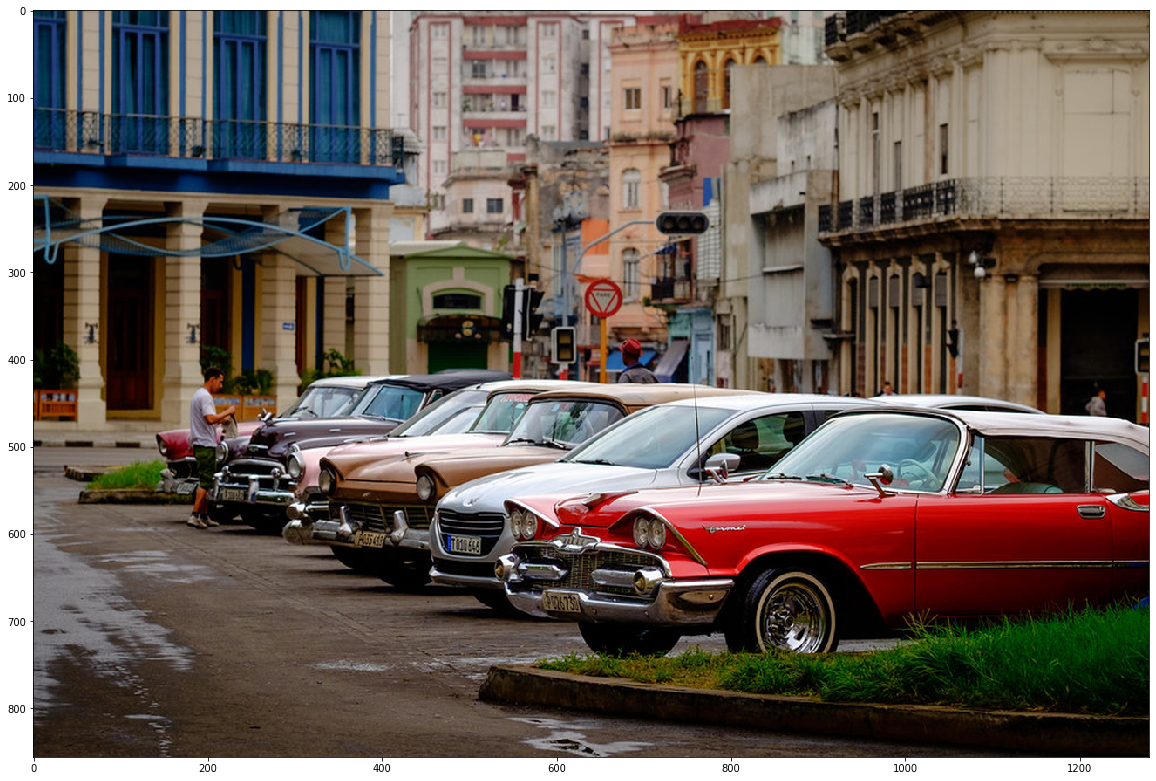

In [8]:
# @title Imports and function definitions

# Runs with stable version tensorflow 2.1.0.

!pip install tensorflow==2.1.0

# For running inference on the TF-Hub module.
import tensorflow as tf


import tensorflow_hub as hub

# For downloading the image.
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

# For drawing onto the image.
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# For measuring the inference time.
import time

# Print Tensorflow version
print(tf.__version__)


# Check available GPU devices.
print("The following GPU devices are available: %s" % tf.test.gpu_device_name())


def display_image(image):
    fig = plt.figure(figsize=(20, 15))
    plt.grid(False)
    plt.imshow(image)


def download_and_resize_image(url, new_width=256, new_height=256,
                              display=False):
    _, filename = tempfile.mkstemp(suffix=".jpg")
    response = urlopen(url)
    image_data = response.read()
    image_data = BytesIO(image_data)
    pil_image = Image.open(image_data)
    pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
    pil_image_rgb = pil_image.convert("RGB")
    pil_image_rgb.save(filename, format="JPEG", quality=90)
    print("Image downloaded to %s." % filename)
    # Uncomment this snippet to see the image you are testing
    if display:
      display_image(pil_image)
    return filename


test_url = "https://live.staticflickr.com/1552/24921917066_8abe2cbb55_b.jpg" #@param ["https://live.staticflickr.com/1552/24921917066_8abe2cbb55_b.jpg","image to test"]
test = download_and_resize_image(test_url, 1280, 856, True)


module_handle = "https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1" #@param ["https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1", "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"]

detector = hub.load(module_handle).signatures['default']


def load_img(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    return img


def run_detector(detector, path):
    img = load_img(path)

    converted_img = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
    start_time = time.time()
    result = detector(converted_img)
    end_time = time.time()

    result = {key: value.numpy() for key, value in result.items()}

    print("Found %d objects." % len(result["detection_scores"]))
    print("Inference time: ", end_time-start_time)

    classes_detected = [x.decode('ascii') for x in result["detection_class_entities"]]
    classes_detected = list(dict.fromkeys(classes_detected))
    print(classes_detected)




run_detector(detector, test)
